# Module "Data Scientist Interview Trainig" Coding Challenge

## Task 1

### Import Modules

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

import statsmodels.api as sm

### Read in files

In [2]:
# Define predictors and target variable
rootdir = os.getcwd()
X_orig = pd.read_csv(f"""{rootdir}/Data/data.csv""", header = None, delim_whitespace = True)
y = pd.read_csv(f"""{rootdir}/Data/target.csv""", header = None)

In [3]:
# Check values of target variable
y.value_counts()

1.0    5018
0.0    4982
dtype: int64

We see that the target variable is binary (i.e. only takes the values 0 or 1) and almost exactly half of the observations are in class 0 and the other in 1. Appropriate classifiers from the scikit package would be:
- Logistic regression
- Support Vector Machines
- Decision Trees
- Random Forest
- Naive Bayes
- K-Nearest Neighbors

In the following, we will prepare the data, create a training and test split and fit the different models. Finally, we will compare the performance of the different models.

In [4]:
# For numerical stability of the predictors, we apply a normalisation operation
standardizer = StandardScaler()
X = standardizer.fit_transform(X_orig)

### Create Training and Test Set (80/20 Split)

In [5]:
# Split the dataframe into 75% training data and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [6]:
# Print size of both sets to ensure all observations are included
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Training set size:  (7500, 130)
Test set size:  (2500, 130)


### Fit Classifiers

In [7]:
# Create a dictionary and store all models in it
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [8]:
# Create dictionaries to store evaluation metrics of the different models
accuracy, precision, recall = {}, {}, {}

# Loop through all models, fit them, make predictions, and calculate evaluation metrics
for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, np.ravel(y_train))
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/ferris/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
# Store metrics in a dataframe and display it
df_model = pd.DataFrame(index = models.keys(), columns = ['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.8404,0.868955,0.828253
Support Vector Machines,0.8396,0.874415,0.823659
Decision Trees,0.8816,0.878315,0.889415
Random Forest,0.9368,0.931357,0.944620
Naive Bayes,0.8356,0.854914,0.829674
K-Nearest Neighbor,0.7908,0.807332,0.789474


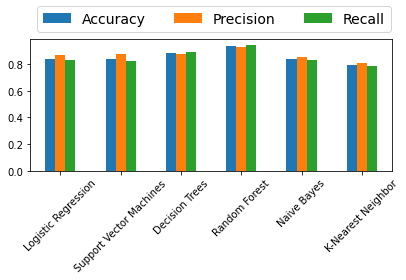

In [10]:
# Create a bar chart to compare the models' performance
ax  = df_model.plot.bar(rot = 45)
ax.legend(ncol = len(models.keys()), bbox_to_anchor = (0, 1), loc = 'lower left', prop = {'size': 14})
plt.tight_layout()

It is important to note that depending on the problem at hand, a high recall might be more useful than a high accuracy.

Since we do not have any details about the predictors or the target variable, and because the Random Forest model performs the best in all three metrics, it would be the most useful model to use in this case.

## Task 2

#### Reduce features

All of the above models were fit using all predictors. However, it is possible that not all of them actually have a significant impact on the target variable. In order to verify this, we will evaluate the p-value of each predictor.

In [11]:
# Create summary statistics of Generalised Linear Model (GLM)
logit_model = sm.GLM(y, X_orig, family = sm.families.Binomial())
result = logit_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9877
Model Family:                Binomial   Df Model:                          122
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3863.1
Date:                Tue, 14 Sep 2021   Deviance:                       7726.1
Time:                        17:48:42   Pearson chi2:                 2.14e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0300      0.029      1.030      0.3

In [12]:
# predictors with p-values < 0.05:
# 7, 23, 44, 54, 74, 79, 83, 85, 101, 110, 118, 128

In [13]:
# Create new dataframe containing only predictors with a p-value below 0.05 
X_reduced = X_orig[[7, 23, 44, 54, 74, 79, 83, 85, 101, 110, 118, 128]]

In [14]:
# Show how many predictors are included
X_reduced.shape[1]

12

In [15]:
# For numerical stability of the predictors, we apply a normalisation operation
standardizer = StandardScaler()
X_reduced = standardizer.fit_transform(X_reduced)

In [16]:
# Split the dataframe into 75% training data and 25% testing data
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size= 0.25, random_state=0)

In [17]:
# Create a dictionary and store all models in it
models_reduced = {}

# Logistic Regression
models_reduced['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models_reduced['Support Vector Machines'] = LinearSVC()

# Decision Trees
models_reduced['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models_reduced['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models_reduced['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models_reduced['K-Nearest Neighbor'] = KNeighborsClassifier()

In [18]:
# Create dictionaries to store evaluation metrics of the different models
accuracy, precision, recall = {}, {}, {}

# Loop through all models, fit them, make predictions, and calculate evaluation metrics
for key in models_reduced.keys():
    
    # Fit the classifier model
    models_reduced[key].fit(X_reduced_train, np.ravel(y_train))
    
    # Prediction 
    predictions = models_reduced[key].predict(X_reduced_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/ferris/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
# Store metrics in a dataframe and display it
df_model_reduced = pd.DataFrame(index = models_reduced.keys(), columns = ['Accuracy', 'Precision', 'Recall'])
df_model_reduced['Accuracy'] = accuracy.values()
df_model_reduced['Precision'] = precision.values()
df_model_reduced['Recall'] = recall.values()

df_model_reduced

,Accuracy,Precision,Recall
Logistic Regression,0.7312,0.698128,0.758475
Support Vector Machines,0.7324,0.695788,0.761742
Decision Trees,0.8092,0.800312,0.822775
Random Forest,0.8736,0.824493,0.920732
Naive Bayes,0.6980,0.595944,0.763237
K-Nearest Neighbor,0.7636,0.735569,0.789121


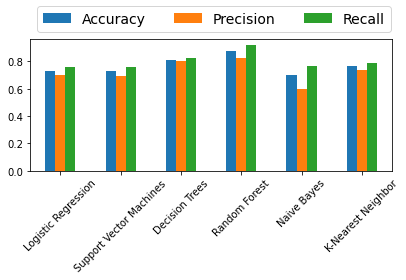

In [20]:
# Create a bar chart to compare the models' performance
ax  = df_model_reduced.plot.bar(rot = 45)
ax.legend(ncol = len(models_reduced.keys()), bbox_to_anchor = (0, 1), loc = 'lower left', prop = {'size': 14})
plt.tight_layout()

In [21]:
# Create dataframe that shows difference in model performance
df_difference = df_model - df_model_reduced
df_difference

,Accuracy,Precision,Recall
Logistic Regression,0.1092,0.170827,0.069778
Support Vector Machines,0.1072,0.178627,0.061917
Decision Trees,0.0724,0.078003,0.066641
Random Forest,0.0632,0.106864,0.023889
Naive Bayes,0.1376,0.258970,0.066438
K-Nearest Neighbor,0.0272,0.071763,0.000352


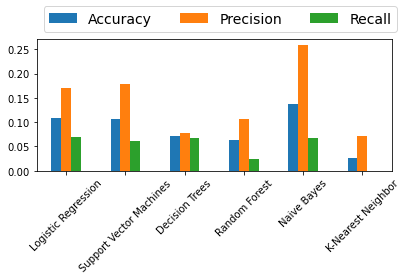

In [22]:
# Create a bar chart to compare the models' performance
ax  = df_difference.plot.bar(rot = 45)
ax.legend(ncol = len(models_reduced.keys()), bbox_to_anchor = (0, 1), loc = 'lower left', prop = {'size': 14})
plt.tight_layout()

All models perform better when all predictors are included. This effect is most pronounced in the precision of Naive Bayes, SVM, and the Logistic Regression.